# Session 1: AI Concepts Visualized
## 2. Underfitting vs. Overfitting

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

## Exercise 2: Underfitting vs. Overfitting

Visualizing the trade-off between bias (too simple) and variance (too complex).
This code demonstrates one of the most critical concepts in Machine Learning: finding the balance between a model that is too simple (high bias) and one that is too complex (high variance).

### The Setup
We generate synthetic data based on a true underlying function: $y = \cos(1.5 \pi x)$. We then add random noise to simulate real-world imperfections. The goal is to see how well different models can "learn" the cosine wave from the noisy dots.



### 1. Degree 1: Underfitting (High Bias)
* **What happens:** We try to fit a straight line (Degree 1) to a curved cosine wave.
* **The Result:** The model is too rigid. It cannot capture the underlying pattern of the data.
* **Diagnosis:** High Bias. The model has erroneous assumptions (it assumes the world is linear) and ignores the data that contradicts this.

### 2. Degree 4: Good Fit (Generalization)
* **What happens:** We use a polynomial of degree 4. This allows the line to curve up and down.
* **The Result:** The blue line (Model) follows the dashed orange line (True Function) almost perfectly. It ignores the random noise and captures the signal.
* **Diagnosis:** Good Generalization. This model will perform well on new, unseen data.

### 3. Degree 15: Overfitting (High Variance)
* **What happens:** We give the model massive flexibility (Degree 15).
* **The Result:** The line wiggles wildly. It passes through almost every single blue dot (the training data), but to do so, it creates crazy spikes that don't match the true cosine wave.
* **Diagnosis:** High Variance. The model "memorized" the noise instead of learning the pattern. It performs perfectly on training data but would fail miserably on new data.

### Key Lesson
Machine Learning is not about getting 100% accuracy on the data you *have*; it is about building a model that works on data you *don't have yet*. Complexity is only good up to a point; beyond that, it destroys performance.

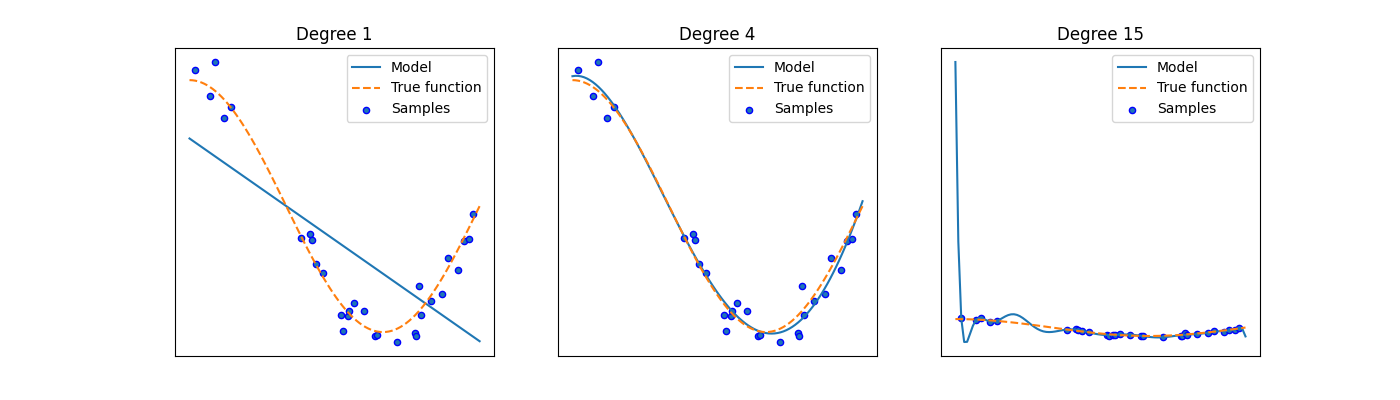

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_function(X):
    return np.cos(1.5 * np.pi * X)

# Generate synthetic data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1

degrees = [1, 4, 15] # 1=Underfit, 4=Good Fit, 15=Overfit
plt.figure(figsize=(14, 4))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate model
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_function(X_test), label="True function", linestyle="--")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.title(f"Degree {degree}")
    plt.legend(loc="best")

plt.show()


### **Observation:**
* **Degree 1 (Underfit):** Too stiff. Cannot capture the curve.
* **Degree 15 (Overfit):** Too flexible. It memorizes the noise rather than the signal.

## Bias vs Variance: Comparing 50 Parallel Universes

In this experiment, we simulate 50 different "parallel universes." 
In each universe, the data scientist gets a slightly different random sample of data from the same real-world process. 
We train a model in each universe and overlay them to see how stable they are.

### The Plots Explained

1.  **Ideal (Degree 4):**
    * **Observation:** The gray lines are tightly bundled (Low Variance), and their average (Red line) perfectly matches the Truth (Black line) (Low Bias).
    * **Meaning:** This model is robust. It doesn't matter which random data sample you get; the result is always good.

2.  **Underfitting (Degree 1):**
    * **Observation:** The gray lines are very stable—they barely move. However, the Red line is straight, while the Truth is curved.
    * **Meaning:** This model is **consistently wrong**. It has High Bias because it refuses to bend, but Low Variance because it ignores the small details of the data.

3.  **Overfitting (Degree 15):**
    * **Observation:** The Red line (Average) actually looks okay! But look at the gray lines—they are exploding at the edges.
    * **Meaning:** This model is **unstable**. If you are unlucky with your data sample, your prediction will be wildly off. This is High Variance.

4.  **High Bias & Variance:**
    * **Observation:** The lines are straight (Bias) but their slopes swing wildly (Variance).
    * **Meaning:** This happens when you have a bad model architecture (Linear) AND not enough data (N=2) to stabilize it.

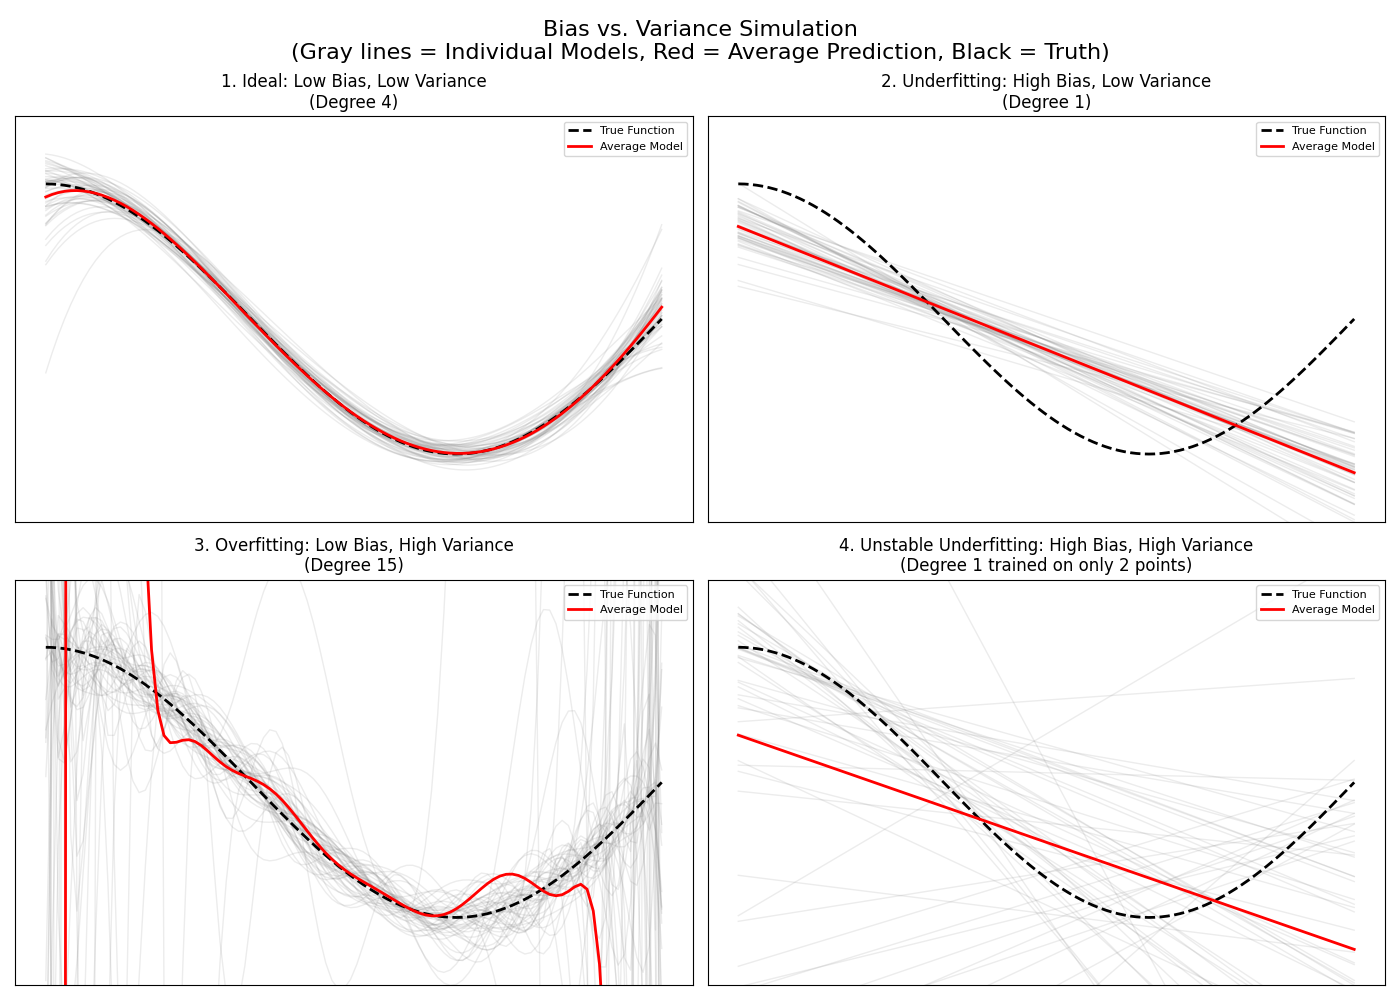

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. The Ground Truth Function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Simulation Settings
n_repeat = 50       # Number of models to train per scenario
n_samples = 20      # Size of each random dataset
noise_level = 0.15  # Amount of noise added to data

# Prepare Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Bias vs. Variance Simulation\n(Gray lines = Individual Models, Red = Average Prediction, Black = Truth)", fontsize=16)

# X for plotting smooth lines
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
y_true = true_fun(X_plot)

# Scenarios configuration
scenarios = [
    {"ax": axes[0, 0], "deg": 4, "points": 30, "title": "1. Ideal: Low Bias, Low Variance\n(Degree 4)"},
    {"ax": axes[0, 1], "deg": 1, "points": 30, "title": "2. Underfitting: High Bias, Low Variance\n(Degree 1)"},
    {"ax": axes[1, 0], "deg": 15, "points": 30, "title": "3. Overfitting: Low Bias, High Variance\n(Degree 15)"},
    {"ax": axes[1, 1], "deg": 1, "points": 2,  "title": "4. Unstable Underfitting: High Bias, High Variance\n(Degree 1 trained on only 2 points)"}
]

np.random.seed()

for s in scenarios:
    ax = s["ax"]
    degree = s["deg"]
    n_train_points = s["points"]

    # Store predictions for all repetitions
    all_predictions = []

    # Run Simulation: Train 50 models on different random datasets
    for _ in range(n_repeat):
        # Generate random data subset
        X_train = np.sort(np.random.rand(n_train_points))
        y_train = true_fun(X_train) + np.random.randn(n_train_points) * noise_level

        # Train Model
        pipeline = Pipeline([
            ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
            ("linear", LinearRegression())
        ])
        pipeline.fit(X_train[:, np.newaxis], y_train)

        # Predict on the smooth plot range
        y_pred = pipeline.predict(X_plot)
        all_predictions.append(y_pred)

        # Plot this individual model (faint gray)
        ax.plot(X_plot, y_pred, color='gray', alpha=0.15, linewidth=1)

    # Convert to array for stats
    all_predictions = np.array(all_predictions)

    # Calculate Average Prediction (Red Line)
    avg_prediction = np.mean(all_predictions, axis=0)

    # Plot Ground Truth (Black Dashed)
    ax.plot(X_plot, y_true, color='black', linestyle='--', linewidth=2, label="True Function")

    # Plot Average Model (Red Solid)
    ax.plot(X_plot, avg_prediction, color='red', linewidth=2, label="Average Model")

    ax.set_ylim(-1.5, 1.5)
    ax.set_title(s["title"])
    ax.legend(loc="upper right", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## "Bullseye" Visualization: Mapping Mathematical Error to Target Practice

This visualization translates the abstract concepts of regression error into a literal target practice scenario.

### How We Created This Target
Instead of looking at the whole line, we pick **two specific points** on the curve ($x=0.2$ and $x=0.8$). We measure the error at these two points for 10 different models.
* **The Center (0,0):** A Perfect Model (0 error at both points).
* **Blue Dot:** One single model's performance.
* **Red X:** The average performance of all 10 models.

### Interpreting the Quadrants

1.  **Low Bias, Low Variance (Top-Left):**
    * The "Sniper." All shots (Blue) are clustered tight, and they are right on the bullseye.

2.  **High Bias (Top-Right):**
    * The "Misaligned Scope." The shots are tight (Low Variance), but they are all hitting the top-right corner. The model is precise but inaccurate.

3.  **High Variance (Bottom-Left):**
    * The "Shaky Hand." The shots are all over the place. Interestingly, the average (Red X) is close to the center!
    * *Key Insight:* In machine learning, we only deploy **one** model. We don't get the luxury of the "Average." If you deploy a High Variance model, you might get one of the extreme blue dots.

4.  **High Bias & Variance (Bottom-Right):**
    * The "Worst Case." The shots are scattered AND off-center.

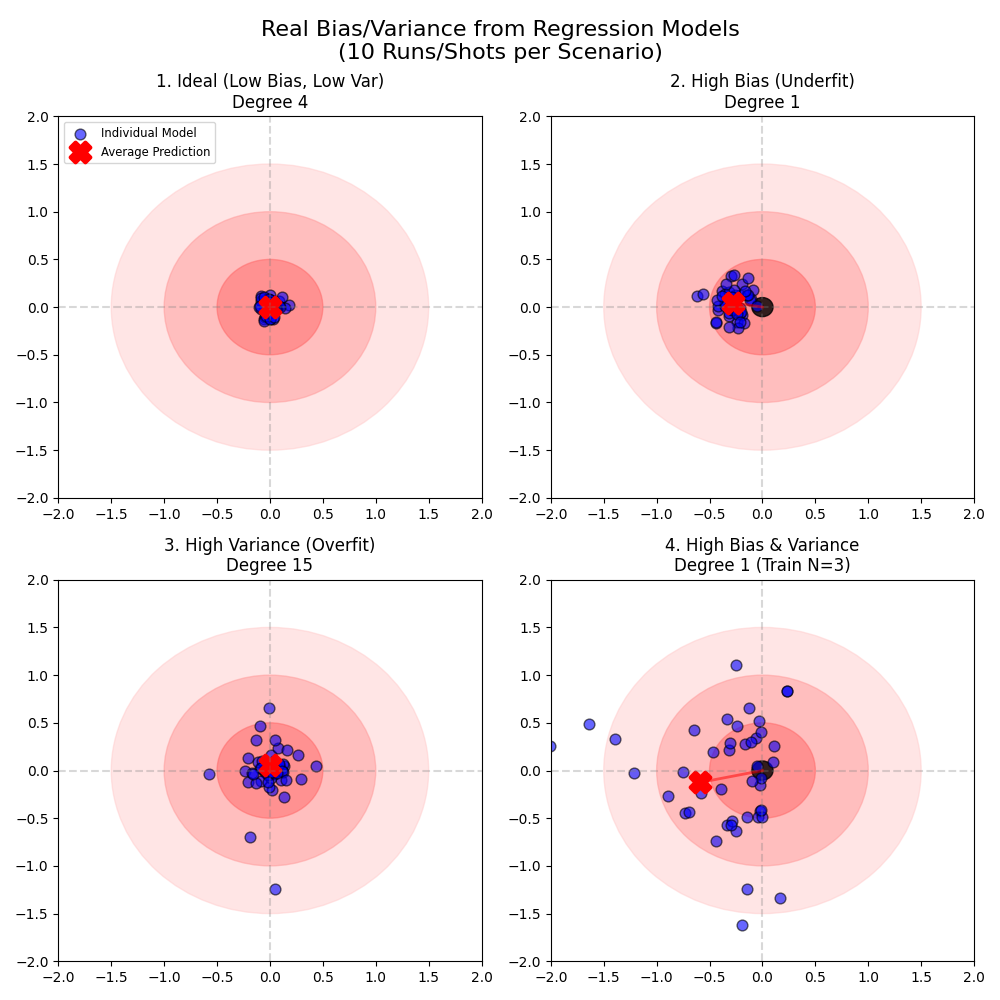

In [4]:
import matplotlib.patches as patches
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# We will measure error at two specific distinct points to create a 2D coordinate
eval_points = np.array([0.2, 0.8])
true_values = true_fun(eval_points) # The "Bullseye" Center

# Simulation Settings
n_shots = 50        # Number of models (shots) per target
noise_level = 0.15   # Noise in training data

def draw_bullseye(ax):
    """Draws a target centered at 0,0"""
    circles = [
        patches.Circle((0, 0), radius=1.5, color='#ffcccc', alpha=0.5), # Outer
        patches.Circle((0, 0), radius=1.0, color='#ff9999', alpha=0.5),
        patches.Circle((0, 0), radius=0.5, color='#ff6666', alpha=0.5),
        patches.Circle((0, 0), radius=0.1, color='black', alpha=0.8)    # Bullseye
    ]
    for c in circles:
        ax.add_patch(c)
    ax.axhline(0, color='gray', linestyle='--', alpha=0.3)
    ax.axvline(0, color='gray', linestyle='--', alpha=0.3)

def get_shots(degree, n_samples):
    """Trains 10 models and returns their errors at the 2 eval points"""
    errors = []

    for _ in range(n_shots):
        # Generate random training data
        X_train = np.sort(np.random.rand(n_samples))
        y_train = true_fun(X_train) + np.random.randn(n_samples) * noise_level

        # Train model
        model = Pipeline([
            ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
            ("linear", LinearRegression())
        ])
        model.fit(X_train[:, np.newaxis], y_train)

        # Predict at our 2 evaluation points
        preds = model.predict(eval_points[:, np.newaxis])

        # Calculate Error (Distance from Truth)
        # Coordinate 1 = Error at x=0.2, Coordinate 2 = Error at x=0.8
        error_vector = preds - true_values
        errors.append(error_vector)

    return np.array(errors)

# Setup Plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f"Real Bias/Variance from Regression Models\n(10 Runs/Shots per Scenario)", fontsize=16)

scenarios = [
    {"ax": axes[0,0], "deg": 4,  "n": 30, "title": "1. Ideal (Low Bias, Low Var)\nDegree 4"},
    {"ax": axes[0,1], "deg": 1,  "n": 30, "title": "2. High Bias (Underfit)\nDegree 1"},
    {"ax": axes[1,0], "deg": 15, "n": 30, "title": "3. High Variance (Overfit)\nDegree 15"},
    {"ax": axes[1,1], "deg": 1,  "n": 3,  "title": "4. High Bias & Variance\nDegree 1 (Train N=3)"}
]

for s in scenarios:
    ax = s["ax"]

    # Draw Background
    draw_bullseye(ax)

    # Get Data
    # Shape: (10, 2) -> 10 shots, x=Error1, y=Error2
    shots = get_shots(s["deg"], s["n"])

    # Calculate Average Model (The Red X)
    avg_shot = np.mean(shots, axis=0)

    # Plot Individual Shots (Blue Dots)
    ax.scatter(shots[:, 0], shots[:, 1], color='blue', alpha=0.6, s=60, edgecolors='k', label='Individual Model')

    # Plot Average (Red X)
    ax.scatter(avg_shot[0], avg_shot[1], color='red', marker='X', s=200, linewidth=3, label='Average Prediction')

    # Plot Bias Line (Distance from Center to Red X)
    ax.plot([0, avg_shot[0]], [0, avg_shot[1]], color='red', linestyle='-', linewidth=2, alpha=0.5)

    # Formatting
    limit = 2.0
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_title(s["title"])
    if s["ax"] == axes[0,0]: # Only legend on first
        ax.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()